In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ConvertColor(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
capturte = cv2.VideoCapture(r"C:\Users\LENOVO\Downloads\Route\vtest.avi")   # 0 is the default camera , 1 is the second camera, path of video file
frame_get = capturte.get(cv2.CAP_PROP_FRAME_COUNT)*np.random.uniform(size=30)  # get the frame count and get 30 random frames

In [4]:
frames = []

for i in frame_get:
    capturte.set(cv2.CAP_PROP_POS_FRAMES, i)  # set the frame id
    ret, frame = capturte.read()  # read the frame
    frames.append(frame)  # append the frame to the frames list
capturte.release()  # release the capture

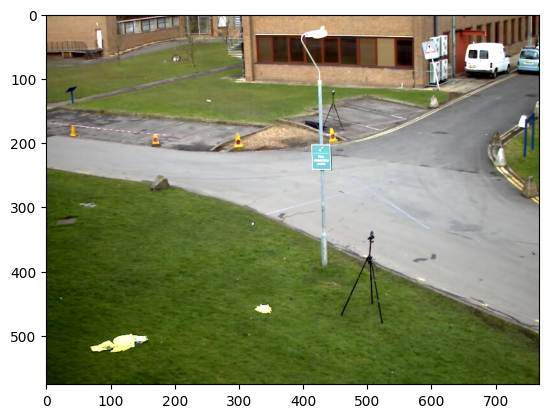

In [6]:
fram_median = np.median(frames, axis=0).astype(np.uint8)  # get the median of the frames
plt.imshow(ConvertColor(fram_median))

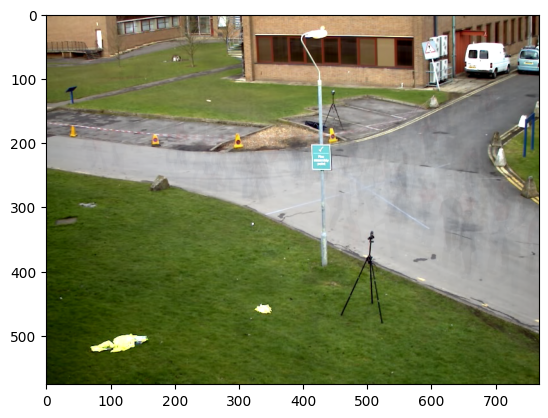

In [7]:
fram_average = np.average(frames, axis=0).astype(np.uint8)  
plt.imshow(ConvertColor(fram_average))

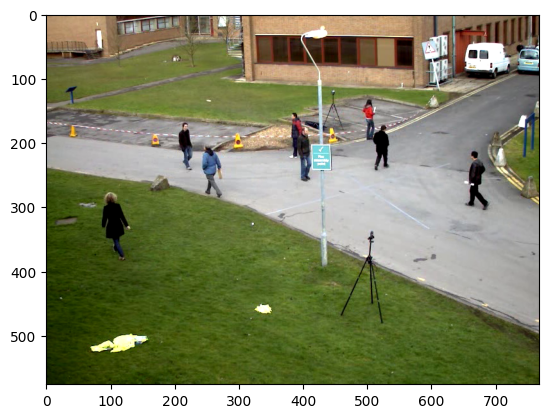

In [12]:
frame = frames[0]
plt.imshow(ConvertColor(frame))

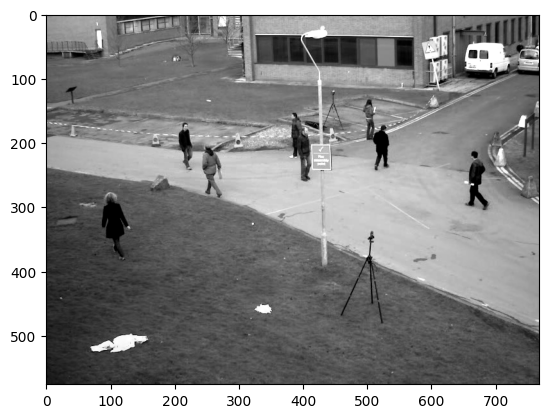

In [13]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(ConvertColor(gray_frame))

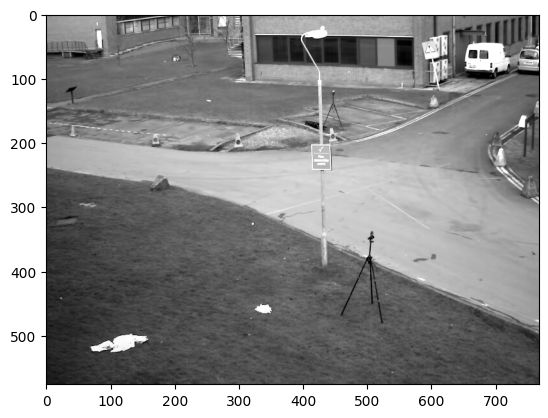

In [14]:
gray_median_frame = cv2.cvtColor(fram_median, cv2.COLOR_BGR2GRAY)
plt.imshow(ConvertColor(gray_median_frame))

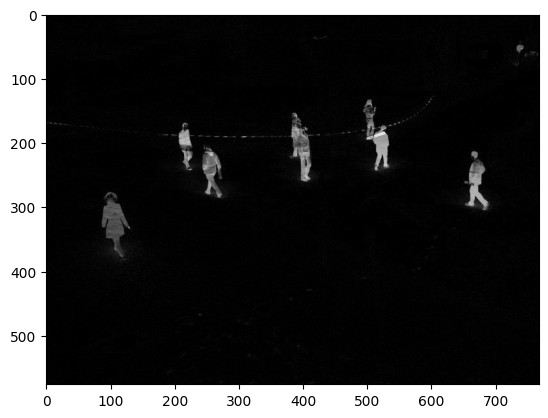

In [15]:
background_remove = cv2.absdiff(gray_frame, gray_median_frame)
plt.imshow(ConvertColor(background_remove))

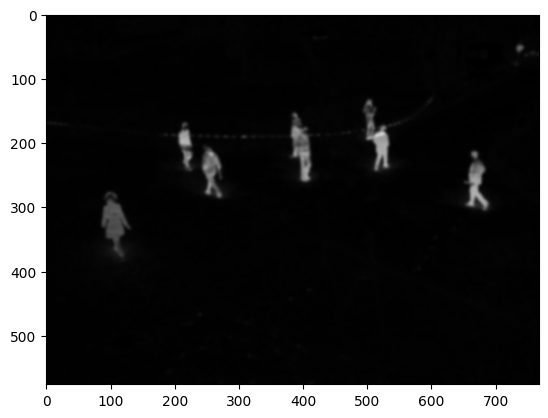

In [16]:
frame_blur = cv2.GaussianBlur(background_remove, (11,11), 0)
plt.imshow(ConvertColor(frame_blur))

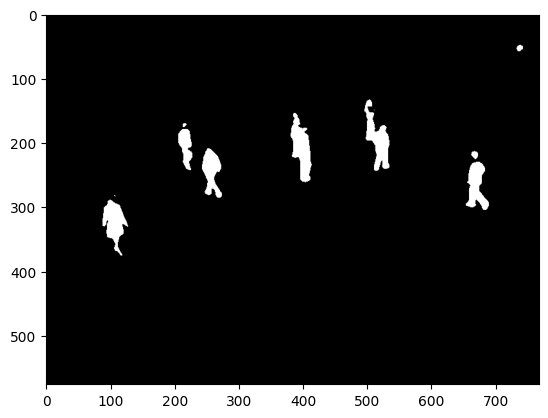

In [17]:
#binary thresholding
ret , frame_treshold = cv2.threshold(frame_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
#THRESH_OTSU is used to automatically calculate the optimal threshold value 
plt.imshow(ConvertColor(frame_treshold))

In [18]:
(contours , _ )=cv2.findContours(frame_treshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

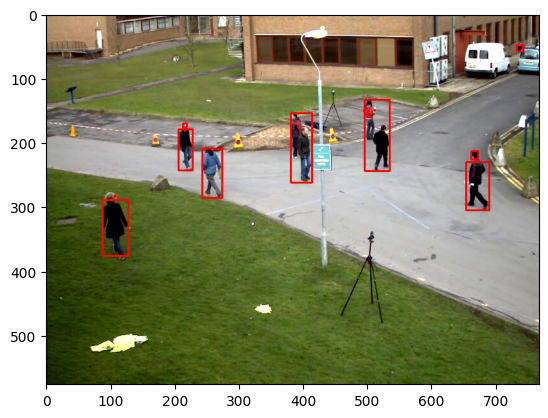

In [19]:
for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
    
plt.imshow(ConvertColor(frame))
plt.show()

## AUTO

In [30]:
capturtes = cv2.VideoCapture(r"C:\Users\LENOVO\Downloads\Route\background video _ people _ walking _.mp4")
back_sub = cv2.createBackgroundSubtractorMOG2()

while capturtes.isOpened():
    ret, frame = capturtes.read() 
    if not ret:
        break
    fg_mask = back_sub.apply(frame)
    (contours , _ )=cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for i in contours:
        if cv2.contourArea(i) > 500:
            x,y,w,h = cv2.boundingRect(i)
            cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.imshow("foreground mask", fg_mask)
    cv2.imshow("original feed", frame)
    if cv2.waitKey(30) & 0xFF == 27:
        break
    
capturtes.release()
cv2.destroyAllWindows()